In [1]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Path of directory
drive_path = "/content/drive/MyDrive"
root_path = f"{drive_path}/master/code-data/mxene_solvent"
solvent_path = f"{drive_path}/master/code-data/solvent"

In [3]:
import pandas as pd

In [4]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/008_dataset_mx_solvent_using_polarity_index.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(444, 63)


,mx,method,solvent,label,inchikey,p,xe,xd,xn,gap_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,9.0,0.40,0.34,0.26,0.0,...,1,1,0,1,0,0,0,1,373.2,760.0
1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,5.2,0.51,0.21,0.28,0.0,...,1,1,0,3,0,0,0,1,351.5,760.0
2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,6.6,0.51,0.19,0.30,0.0,...,1,1,0,2,0,0,0,1,337.8,760.0
3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,5.4,0.36,0.24,0.40,0.0,...,0,1,0,4,0,0,0,1,329.3,760.0
4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,6.2,0.33,0.26,0.41,0.0,...,0,1,0,3,0,0,0,1,354.8,760.0


In [5]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]

In [6]:
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]


In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb

In [8]:
df_mx_solvent_data_labeled['method'] = df_mx_solvent_data_labeled['method'].astype('category').cat.codes

In [9]:
df_mx_solvent_data_labeled.head()

,mx,method,solvent,label,inchikey,p,xe,xd,xn,work_function_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,Ti3C2,0,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,9.0,0.40,0.34,0.26,1.985656,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,Ti3C2,0,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,5.2,0.51,0.21,0.28,1.985656,...,46.07,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,Ti3C2,0,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,6.6,0.51,0.19,0.30,1.985656,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,Ti3C2,0,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,5.4,0.36,0.24,0.40,1.985656,...,58.08,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,Ti3C2,0,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,6.2,0.33,0.26,0.41,1.985656,...,41.05,0.0,23.8,29.3,0,1,0,3,0,354.8


In [10]:
features = ['method', 'p', 'xe', 'xd', 'xn', 'work_function_oh',
   'formation_energy_oh', 'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
   'plasmafrequency_x_oh', 'plasmafrequency_y_oh', 'has_inversion_symmetry_oh',
   'gap_o', 'work_function_o', 'formation_energy_o', 'ehull_o',
   'alphax_el_o', 'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
    'has_inversion_symmetry_o', 'work_function_f',
   'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f', 'plasmafrequency_x_f',
   'plasmafrequency_y_f', 'has_inversion_symmetry_f',
   'molecular_weight', 'xlogp',  'tpsa', 'complexity', 'h_bond_donor_count', 'h_bond_acceptor_count',
   'rotatable_bond_count', 'heavy_atom_count',  'atom_stereo_count',
    'boiling_point']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [11]:
X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')

/tmp/ipython-input-11-2546690500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')


In [12]:
X.head()

,method,p,xe,xd,xn,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,9.0,0.40,0.34,0.26,1.985656,-1.294839,0.123329,32.369286,32.369286,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,0,5.2,0.51,0.21,0.28,1.985656,-1.294839,0.123329,32.369286,32.369286,...,46.070,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,0,6.6,0.51,0.19,0.30,1.985656,-1.294839,0.123329,32.369286,32.369286,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,0,5.4,0.36,0.24,0.40,1.985656,-1.294839,0.123329,32.369286,32.369286,...,58.080,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,0,6.2,0.33,0.26,0.41,1.985656,-1.294839,0.123329,32.369286,32.369286,...,41.050,0.0,23.8,29.3,0,1,0,3,0,354.8


In [13]:
y.head()

,label
0,1
1,1
2,-1
3,-1
4,-1


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [16]:
X_train = X_scaled[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [17]:
label_map = {-1: 0, 1: 1}
labeled_mask = y != 0
y_labeled = y[labeled_mask].map(label_map)
X_labeled = X[labeled_mask]

In [18]:
X_unlabeled = X[y == 0]
df_unlabeled = df_mx_solvent_data_labeled[y == 0].copy()

In [19]:
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_labeled, y_labeled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:38:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [20]:
proba_unlabeled = clf.predict_proba(X_unlabeled)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

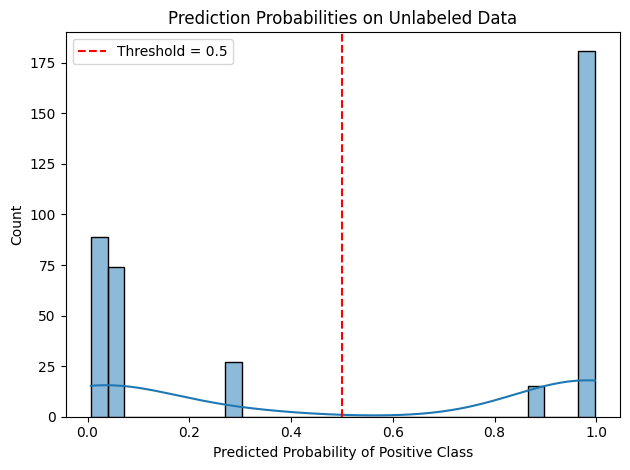

In [22]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba']])

                    solvent     mx  predicted_proba
140    N-methyl pyrrolidone   V2C1         0.997091
245    N-methyl pyrrolidone  Ti2C1         0.997091
246    N-methyl pyrrolidone  Ti2C1         0.997091
193    N-methyl pyrrolidone  Mo2C1         0.997091
192    N-methyl pyrrolidone  Mo2C1         0.997091
352    N-methyl pyrrolidone   V4C3         0.997091
405    N-methyl pyrrolidone  Ta4C3         0.997091
299    N-methyl pyrrolidone  Zr3C2         0.997091
298    N-methyl pyrrolidone  Zr3C2         0.997091
404    N-methyl pyrrolidone  Ta4C3         0.997091
244  N, N-dimethylformamide  Ti2C1         0.992788
242      dimethyl sulfoxide  Ti2C1         0.992788
295      dimethyl sulfoxide  Zr3C2         0.992788
136      dimethyl sulfoxide   V2C1         0.992788
138  N, N-dimethylformamide   V2C1         0.992788
137      dimethyl sulfoxide   V2C1         0.992788
139  N, N-dimethylformamide   V2C1         0.992788
87   N, N-dimethylformamide  Nb2C1         0.992788
88   N, N-di

In [24]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent', 'predicted_proba']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
        mx          solvent  predicted_proba
63   Ti3C2  Dichloromethane         0.006466
104  Nb2C1  Dichloromethane         0.006466
103  Nb2C1  Dichloromethane         0.006466
155   V2C1  Dichloromethane         0.006466
209  Mo2C1  Dichloromethane         0.006466
208  Mo2C1  Dichloromethane         0.006466
156   V2C1  Dichloromethane         0.006466
261  Ti2C1  Dichloromethane         0.006466
315  Zr3C2  Dichloromethane         0.006466
314  Zr3C2  Dichloromethane         0.006466
367   V4C3  Dichloromethane         0.006466
368   V4C3  Dichloromethane         0.006466
262  Ti2C1  Dichloromethane         0.006466
421  Ta4C3  Dichloromethane         0.006466
420  Ta4C3  Dichloromethane         0.006466
157   V2C1  tetrahydrofuran         0.006864
264  Ti2C1  tetrahydrofuran         0.006864
263  Ti2C1  tetrahydrofuran         0.006864
211  Mo2C1  tetrahydrofuran         0.006864
210  Mo2C1  tetrahydrofuran         0.00

In [25]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    386.000000
mean       0.529514
std        0.463875
min        0.006466
25%        0.043001
50%        0.886638
75%        0.991424
max        0.997091
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)          163
Low (0.1–0.3)             27
Mid (0.3–0.5)              0
High (0.5–0.7)             0
Very High (0.7–0.9)       15
Extremely High (>0.9)    181
Name: count, dtype: int64


In [26]:
train_path = f"{drive_path}/master/code-data/training/polarity/"

In [27]:
df_unlabeled.to_csv(f"{train_path}/002_positive_vs_negative_predictions_on_unlabeled_xgboost_polarity.csv")
df_unlabeled.to_pickle(f"{train_path}/002_positive_vs_negative_predictions_on_unlabeled_xgboost_polarity.pkl")


                      Feature  Importance
4                          xn    0.481967
42              boiling_point    0.309342
35                       tpsa    0.085701
33           molecular_weight    0.054455
34                      xlogp    0.030113
1                           p    0.025258
2                          xe    0.010562
36                 complexity    0.001353
37         h_bond_donor_count    0.001249
0                      method    0.000000
3                          xd    0.000000
10               alphaz_el_oh    0.000000
9                alphay_el_oh    0.000000
8                alphax_el_oh    0.000000
7                    ehull_oh    0.000000
6         formation_energy_oh    0.000000
5            work_function_oh    0.000000
11       plasmafrequency_x_oh    0.000000
12       plasmafrequency_y_oh    0.000000
19                alphay_el_o    0.000000
20                alphaz_el_o    0.000000
13  has_inversion_symmetry_oh    0.000000
14                      gap_o    0

/tmp/ipython-input-29-1121508283.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


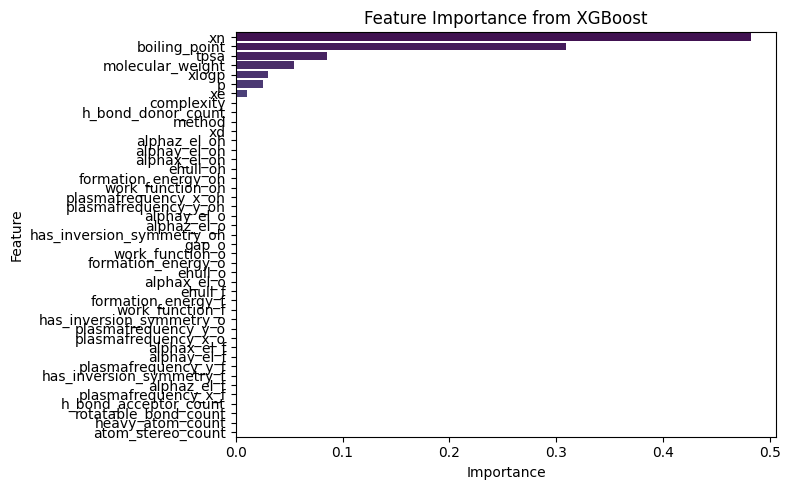

In [29]:
importances = clf.feature_importances_
feature_names = features

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from XGBoost')
plt.tight_layout()
plt.show()

Top 10 Feature Importances:
               Feature  Importance
4                   xn    0.481967
42       boiling_point    0.309342
35                tpsa    0.085701
33    molecular_weight    0.054455
34               xlogp    0.030113
1                    p    0.025258
2                   xe    0.010562
36          complexity    0.001353
37  h_bond_donor_count    0.001249
0               method    0.000000


/tmp/ipython-input-30-3810259604.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


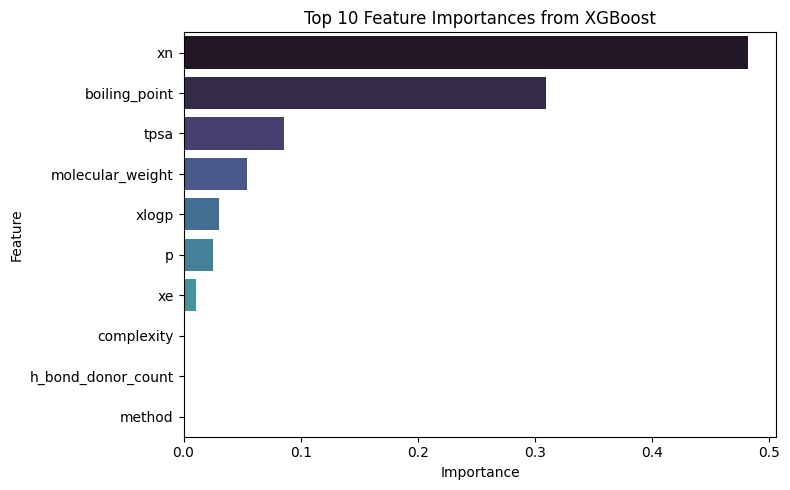

In [30]:

# Create and sort feature importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)  # Change to .head(15) for top 15

# Print top features
print("Top 10 Feature Importances:")
print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
plt.title('Top 10 Feature Importances from XGBoost')
plt.tight_layout()
plt.show()